In [1]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

In [2]:
%config InlineBackend.figure_format="retina"
%matplotlib inline

In [3]:
class TextAnalysis:
    
    def __init__(self, source, columns, custom_stopwords):
        self.bow = []
        self.source = source
        self.columns = columns
        self.review = pd.read_csv(self.source)
        self.review = self.review[self.columns]
        self.custom_stopwords = custom_stopwords
        self.review["Clean_Review"] = self.review["Review"].apply(self.cleaning).apply(lambda x: " ".join(x))
    
    def show_clean(self):
        return self.review
    
    def cleaning(self, reviews):
        self.reviews_clean_tokens = word_tokenize(re.sub("[\s]+"," ", re.sub("[^\w\s]+"," ",reviews)).lower())
        self.bow = [terms for terms in self.reviews_clean_tokens if terms not in (stopwords.words('english')+self.custom_stopwords) and len(terms)>3 and len(terms)<10]
        lemm = WordNetLemmatizer()
        self.bow = [lemm.lemmatize(term) for term in self.bow]
        return self.bow
    
    def text_clean(self):
        self.reviews_combined = " ".join(self.review.iloc[:,0].values)
        bow = self.cleaning(reviews=self.reviews_combined)
        return bow
    
    def draw_fdist_graph(self):
        all_terms = self.text_clean()
        self.fdist = FreqDist(all_terms)
        self.df_dist = pd.DataFrame(self.fdist.items(), columns = ["words","freq"])
        self.df_dist.sort_values(ascending=False, by="freq").head(30).plot.bar(x= "words", y= "freq",figsize=(20,5)) 
        
    def draw_fdist_graph_ngram(self, ngram=(1,1), max_features=150):
        ngram_count_vectorizer = CountVectorizer(ngram_range=ngram,max_features=max_features)
        X_ngram = ngram_count_vectorizer.fit_transform(self.review["Clean_Review"])
        DTM_ngram = pd.DataFrame(X_ngram.toarray(), columns=ngram_count_vectorizer.get_feature_names())
        DTM_ngram.sum().sort_values(ascending=False).head(30).plot.bar(figsize=(20,5)) 
        
    def create_wordcloud(self):
        reviews_combined_clean = " ".join(self.text_clean())
        word_cloud = WordCloud(width=800,height=800,background_color='white',max_words=150).generate_from_text(reviews_combined_clean)
        plt.figure(figsize=[8,8])
        plt.imshow(word_cloud)
        plt.show()

In [4]:
x = TextAnalysis(source="carreviews/Scraped_Car_Review_ram.csv", columns=["Review", "Rating"], custom_stopwords=["like"])

In [5]:
x.show_clean()

,Review,Rating,Clean_Review
0,Cargo space is generous for a minivan - no ba...,4.00,cargo space generous minivan back seat liked r...
1,I am an appliance repair(wo)man. Bought the v...,5.00,appliance repair bought year later changed fro...
2,I just got the C/V as a company vehicle about...,5.00,company vehicle month coming ford transit vehi...
3,It's basically a gutted grand caravan.The int...,4.25,basically gutted grand caravan interior identi...
4,I have owned to truck from New for over 2 yea...,5.00,owned truck year roughly issue change ever bel...
...,...,...,...
561,i owned this dakota for 2 YEARS and i love it...,5.00,owned dakota year love powerful spacicous reil...
562,"Fit and finish is very good, ride is comforta...",2.75,finish good ride however sorely lacking best r...
563,I love the truck but the only thing i would c...,5.00,love truck thing would change would rather gre...
564,Good truck had it for 4 years and all it has ...,5.00,good truck year change


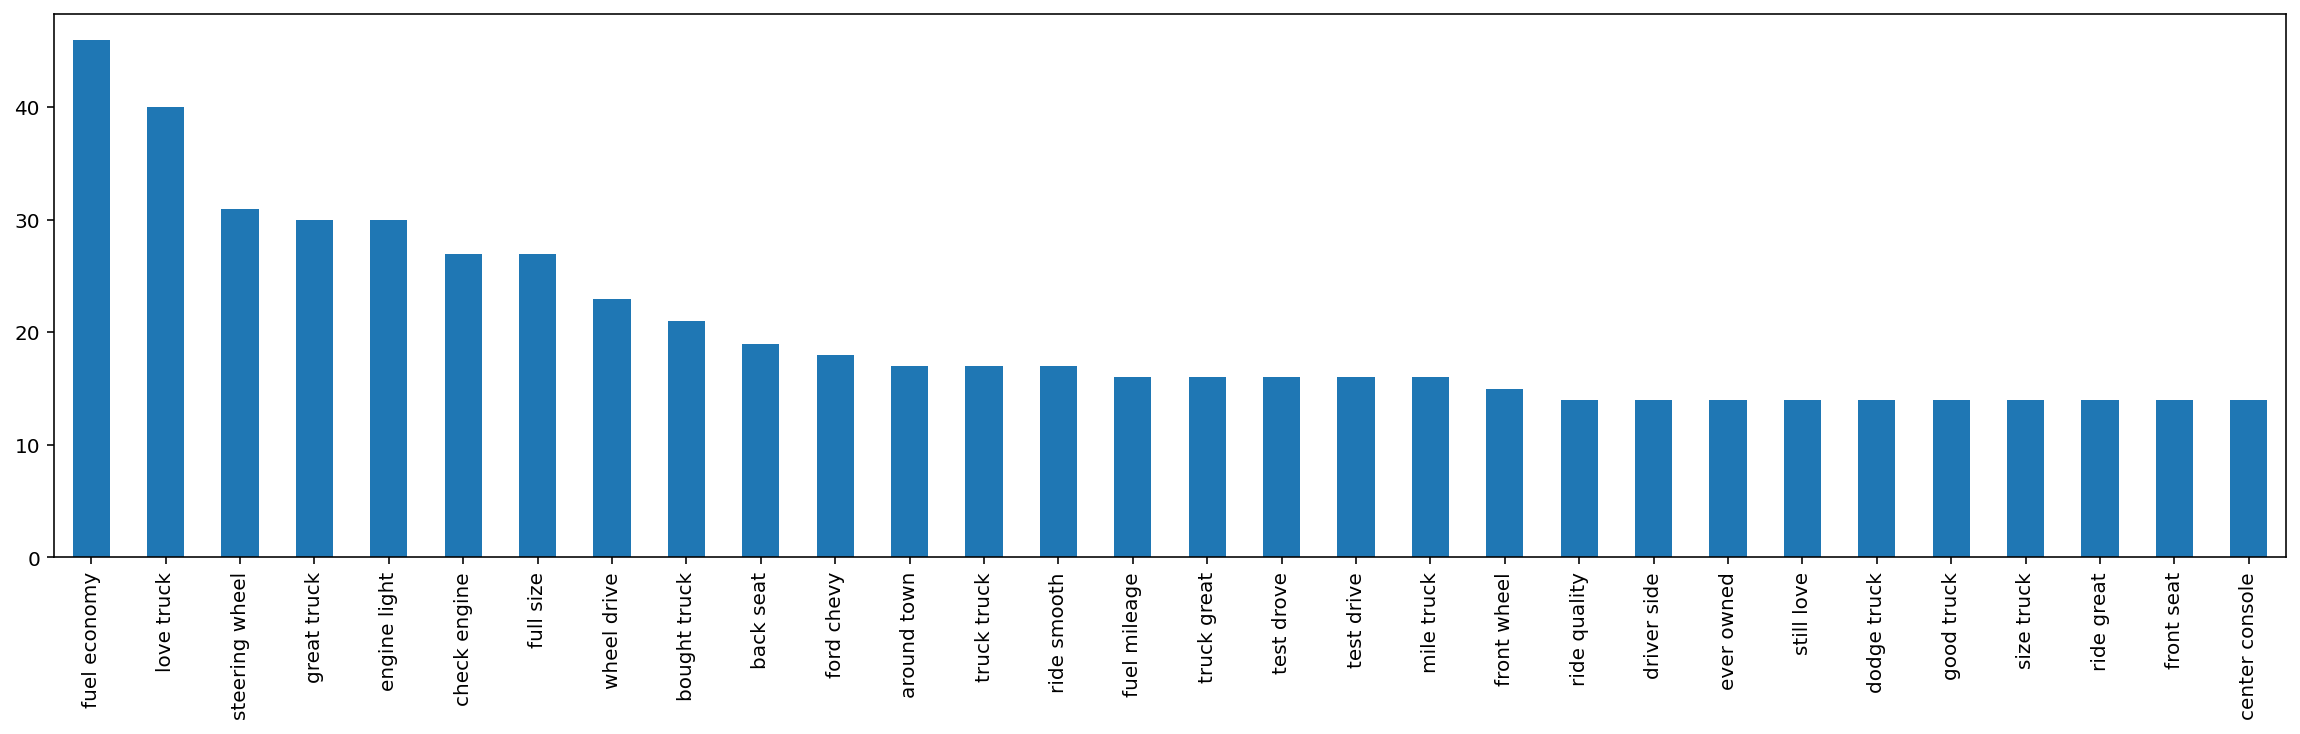

In [36]:
x.draw_fdist_graph_ngram(ngram=(2,2))

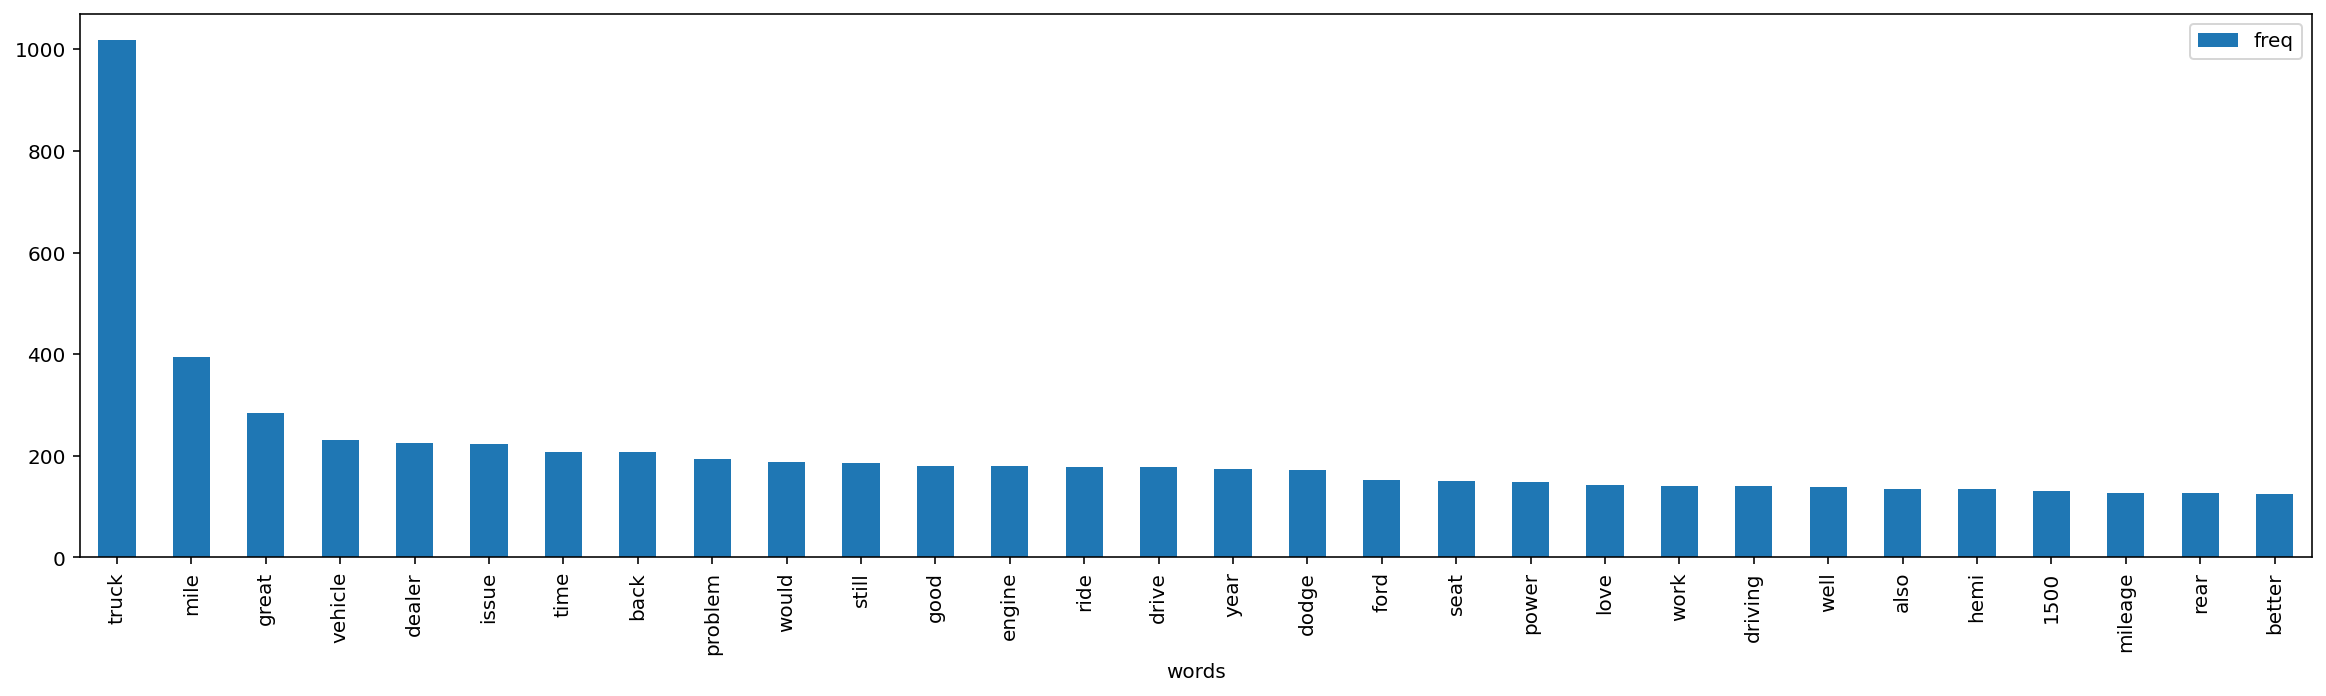

In [37]:
x.draw_fdist_graph()

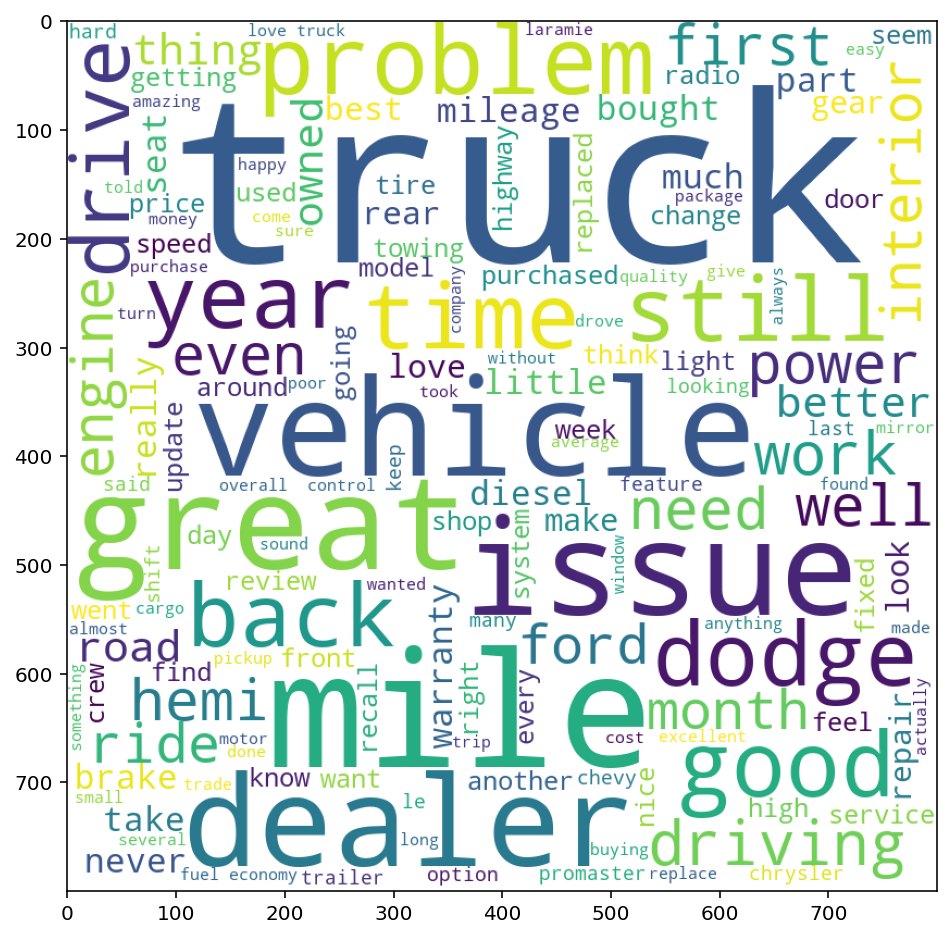

In [38]:
x.create_wordcloud()